## Team Member Names: Madeline Witters {-}

## Project Title: Predicting Customer Churn and Identifying Attributes of At-Risk Customers {-}

**Exploratory Data Analysis**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.linear_model import LogisticRegressionCV
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")
data = data.drop("customer_id", axis=1)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [4]:
#info on why it's best to not do too much one-hot encoding for trees: 
#https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

#outlier removal (do before standardization): 
#https://medium.com/geekculture/essential-guide-to-handle-outliers-for-your-logistic-regression-model-63c97690a84d

In [5]:
null_check = data.isnull().any() #no missing data in the dataframe
null_check

credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [6]:
#data.min()

In [7]:
#data.max()

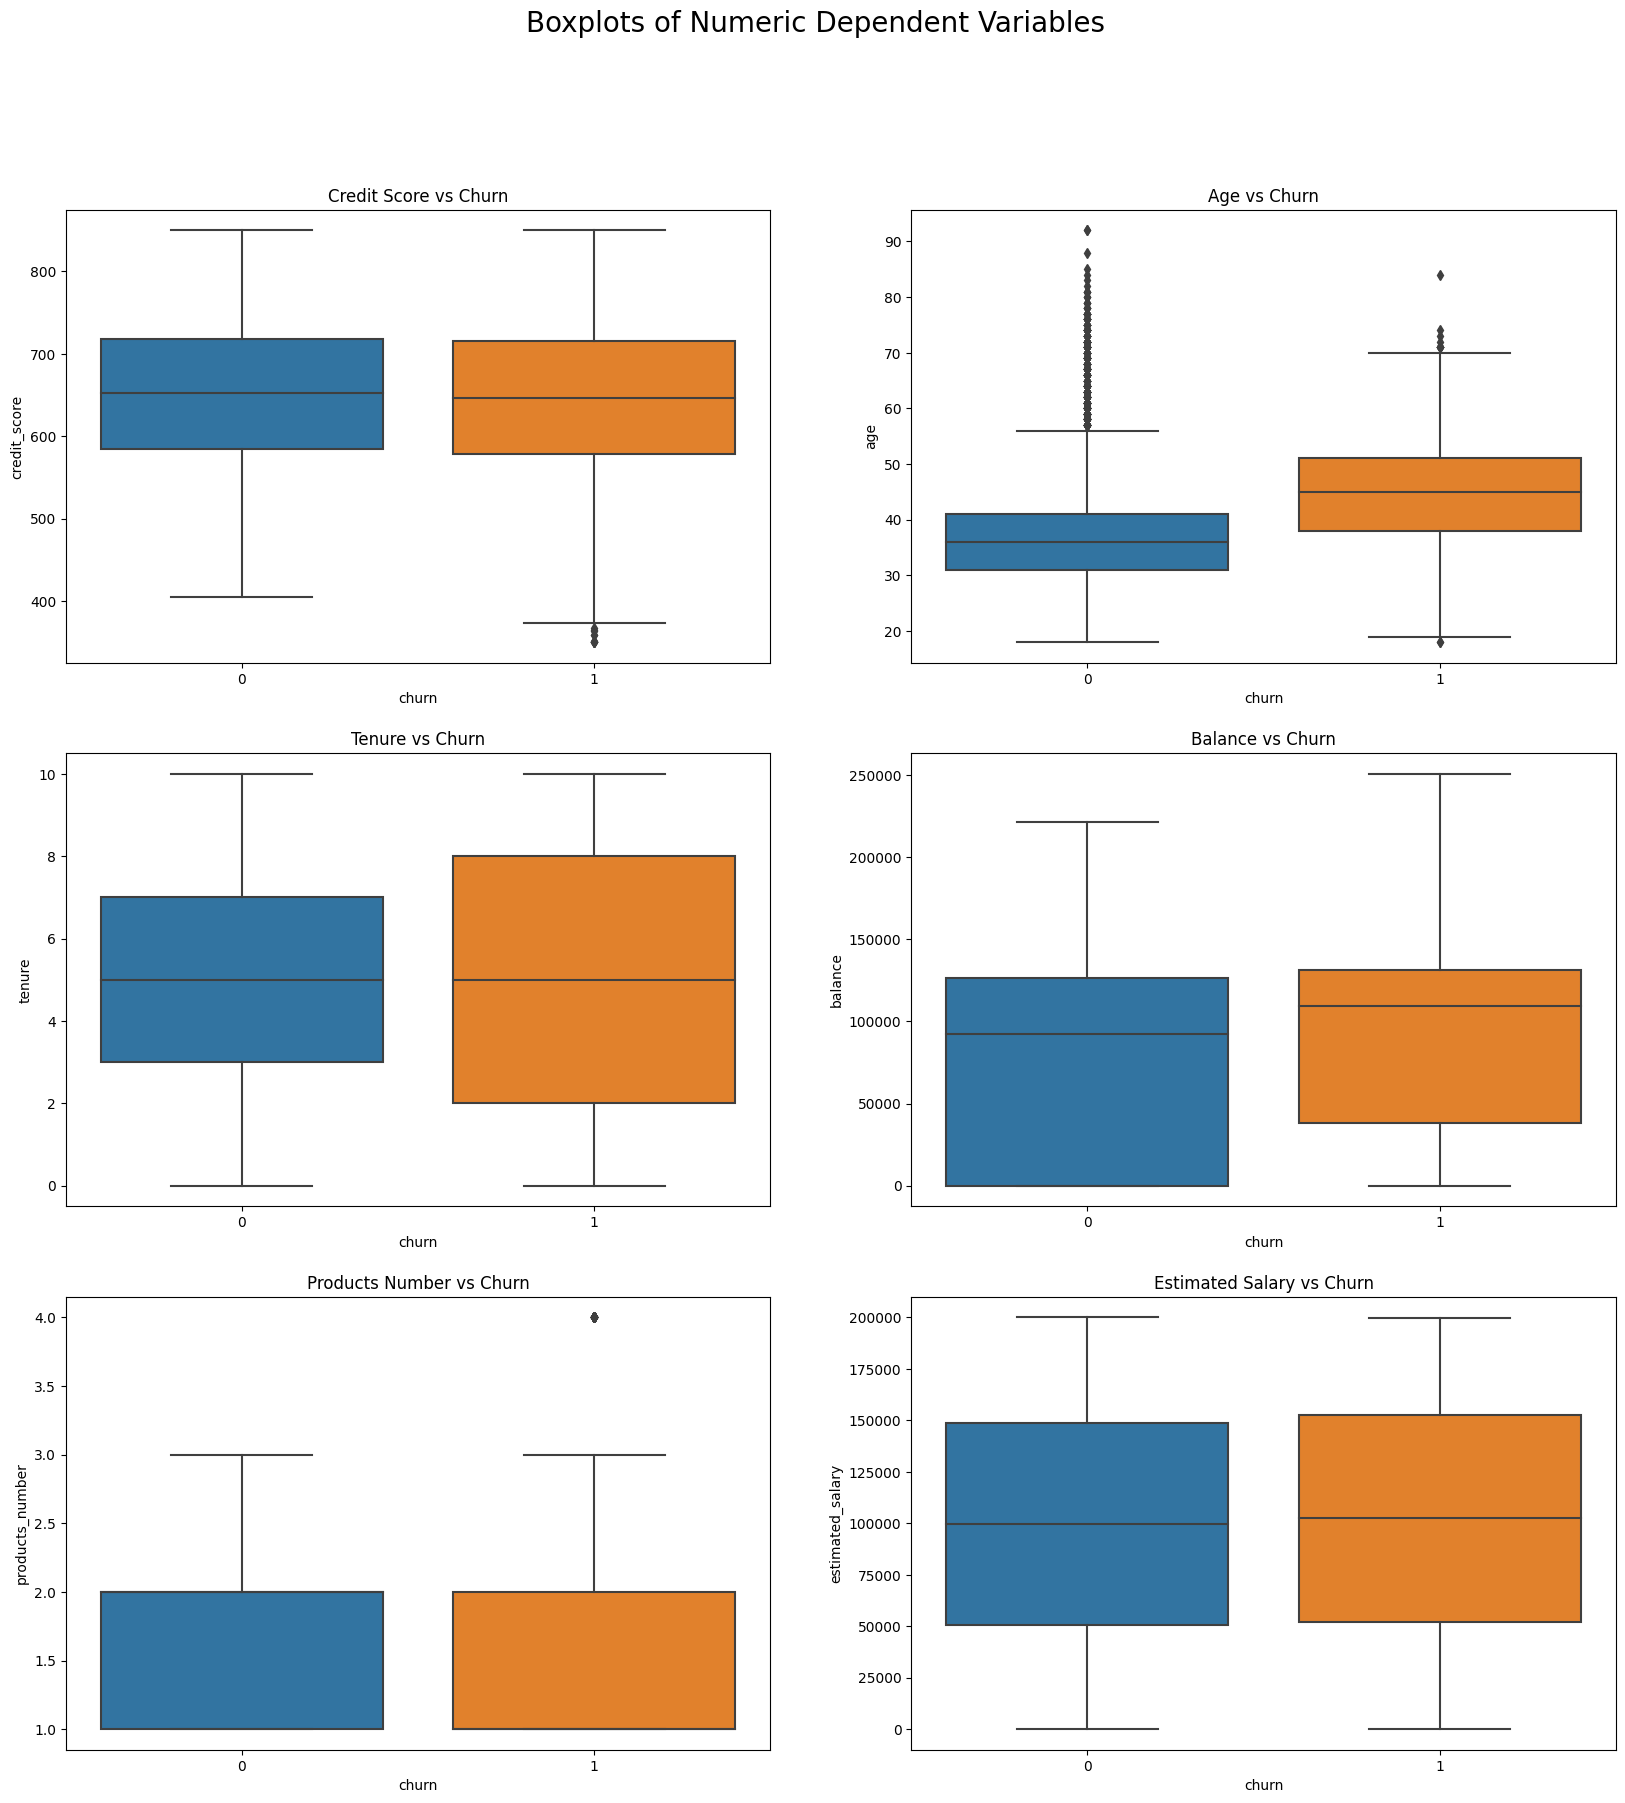

In [8]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("Boxplots of Numeric Dependent Variables", fontsize=20) 

ax1 = plt.subplot(3,2,1)
sns.boxplot(x='churn', y='credit_score', data=data)

ax2 = plt.subplot(3,2,2)
sns.boxplot(x='churn', y='age', data=data)

ax3 = plt.subplot(3,2,3)
sns.boxplot(x='churn', y='tenure', data=data)

ax4 = plt.subplot(3,2,4)
sns.boxplot(x='churn', y='balance', data=data)

ax5 = plt.subplot(3,2,5)
sns.boxplot(x='churn', y='products_number', data=data)

ax6 = plt.subplot(3,2,6)
sns.boxplot(x='churn', y='estimated_salary', data=data)

ax1.title.set_text("Credit Score vs Churn")
ax2.title.set_text("Age vs Churn")
ax3.title.set_text("Tenure vs Churn")
ax4.title.set_text("Balance vs Churn")
ax5.title.set_text("Products Number vs Churn")
ax6.title.set_text("Estimated Salary vs Churn")

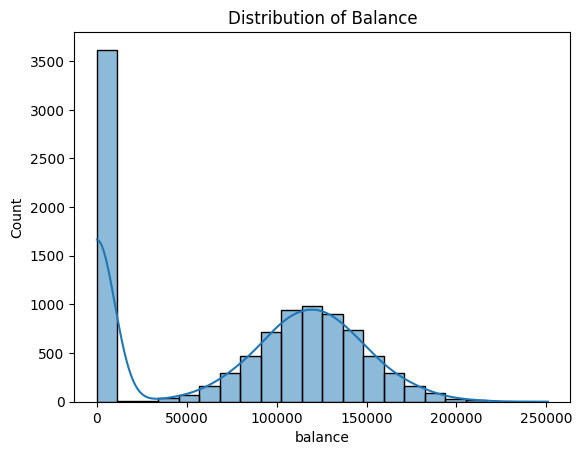

In [9]:
sns.histplot(data=data, x="balance", kde=True).set(title="Distribution of Balance")
plt.show()

In [10]:
credit_score_zs = stats.zscore(data['credit_score'])

In [11]:
age_z = stats.zscore(data['age'])

In [12]:
ten_z = stats.zscore(data['tenure'])
print(ten_z)

0      -1.041760
1      -1.387538
2       1.032908
3      -1.387538
4      -1.041760
          ...   
9995   -0.004426
9996    1.724464
9997    0.687130
9998   -0.695982
9999   -0.350204
Name: tenure, Length: 10000, dtype: float64


In [13]:
bal_z = stats.zscore(data['balance'])
print(bal_z)

0      -1.225848
1       0.117350
2       1.333053
3      -1.225848
4       0.785728
          ...   
9995   -1.225848
9996   -0.306379
9997   -1.225848
9998   -0.022608
9999    0.859965
Name: balance, Length: 10000, dtype: float64


In [14]:
prod_z = stats.zscore(data['products_number'])
print(prod_z)

0      -0.911583
1      -0.911583
2       2.527057
3       0.807737
4      -0.911583
          ...   
9995    0.807737
9996   -0.911583
9997   -0.911583
9998    0.807737
9999   -0.911583
Name: products_number, Length: 10000, dtype: float64


In [15]:
sal_z = stats.zscore(data['estimated_salary'])
print(sal_z)

0       0.021886
1       0.216534
2       0.240687
3      -0.108918
4      -0.365276
          ...   
9995   -0.066419
9996    0.027988
9997   -1.008643
9998   -0.125231
9999   -1.076370
Name: estimated_salary, Length: 10000, dtype: float64


In [16]:
threshold = 3
outlier = [] #write in report about how I conducted outlier analysis, and why I decided not to exclude any points
for z in age_z: #further address how this could be modeled in the future (segment customers by age, products number) + build more models
    if z > threshold: #this could be addressed in conclusion or EDA section
        outlier.append(z)
#print('outlier in dataset is', outlier)
#print(len(outlier))

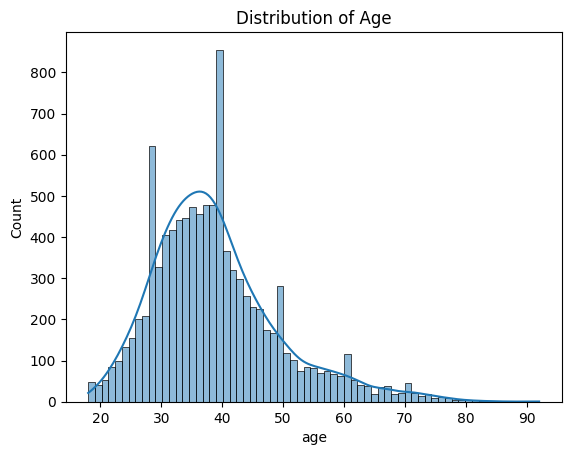

In [17]:
sns.histplot(data=data, x="age", kde=True).set(title="Distribution of Age")
plt.show()

In [18]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

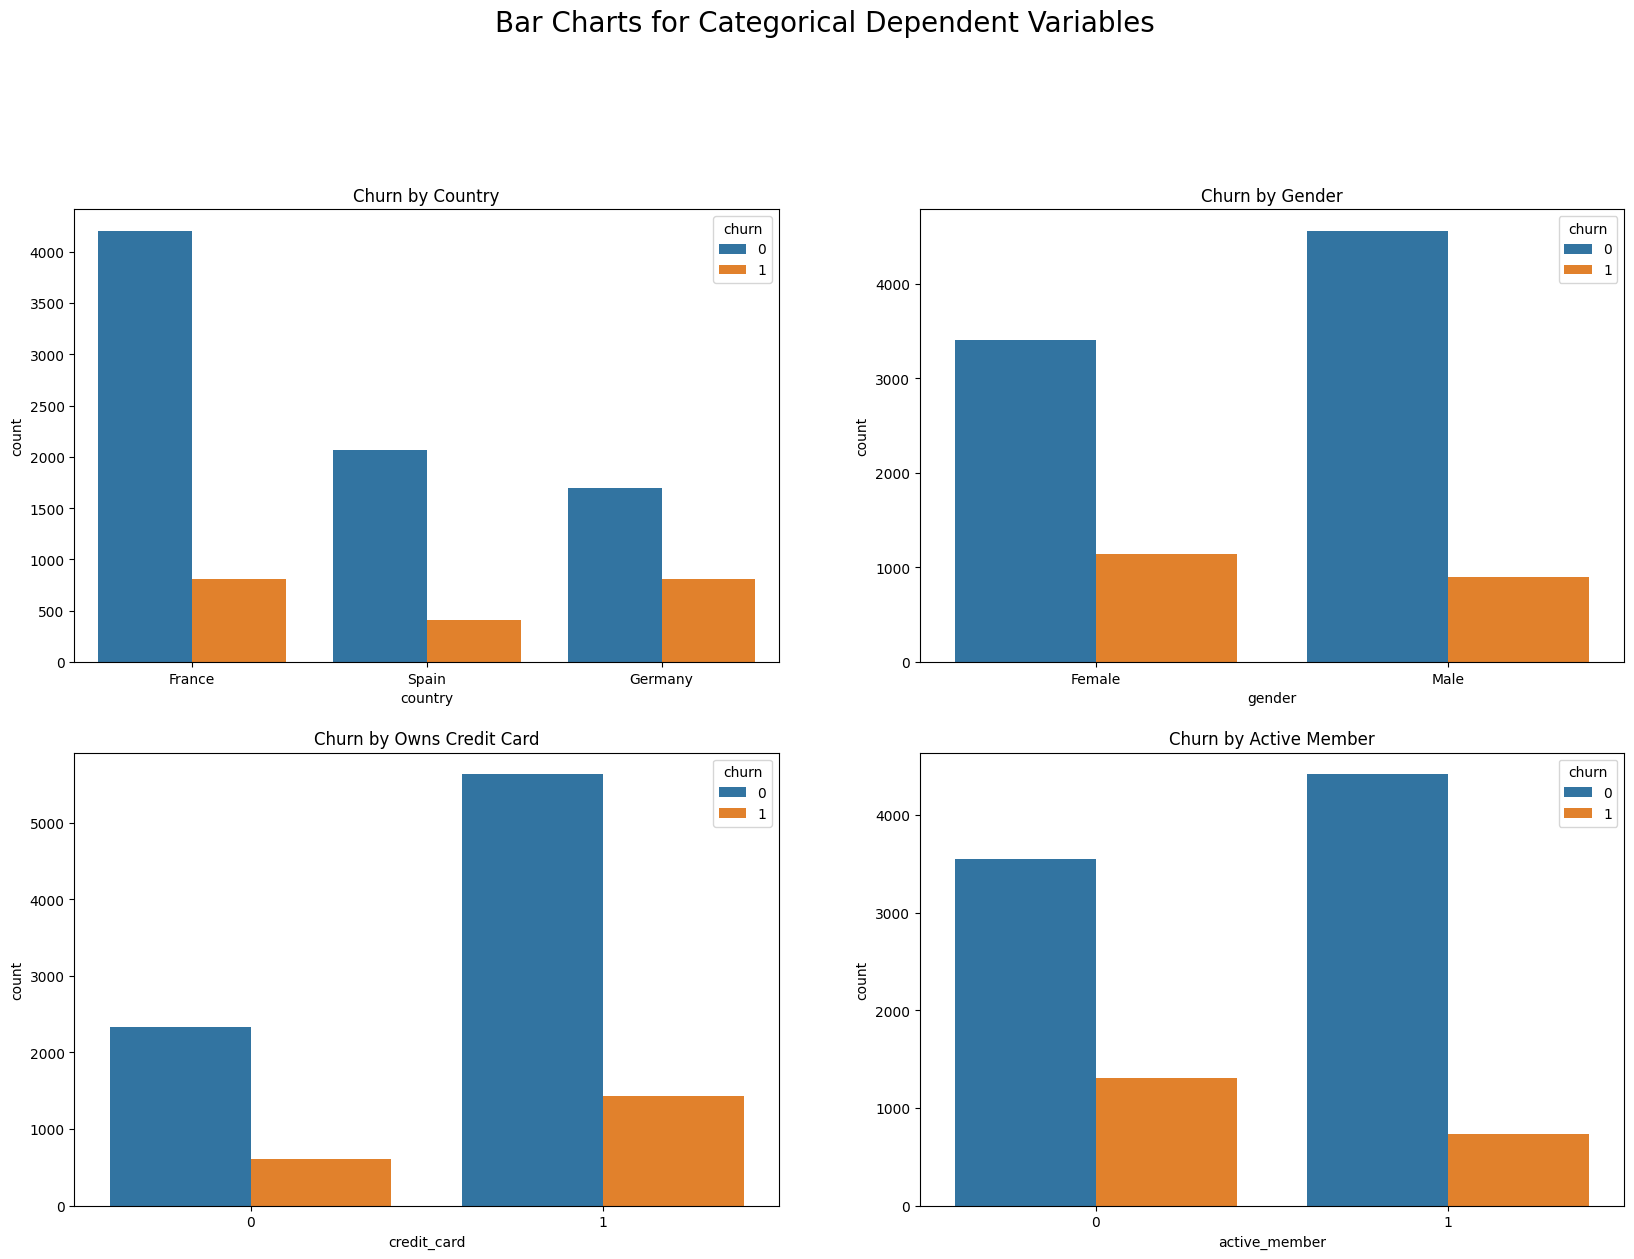

In [19]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("Bar Charts for Categorical Dependent Variables", fontsize=20) 

ax1 = plt.subplot(3,2,1)
sns.countplot(data=data, x="country", hue="churn")

ax2 = plt.subplot(3,2,2)
sns.countplot(data=data, x="gender", hue="churn")

ax3 = plt.subplot(3,2,3)
sns.countplot(data=data, x="credit_card", hue="churn")

ax4 = plt.subplot(3,2,4)
sns.countplot(data=data, x="active_member", hue="churn")

ax1.title.set_text("Churn by Country")
ax2.title.set_text("Churn by Gender")
ax3.title.set_text("Churn by Owns Credit Card")
ax4.title.set_text("Churn by Active Member")

plt.show()

In [20]:
crosstable = pd.crosstab(data['churn'], data['gender'])
crosstable

gender,Female,Male
churn,,
0,3404,4559
1,1139,898


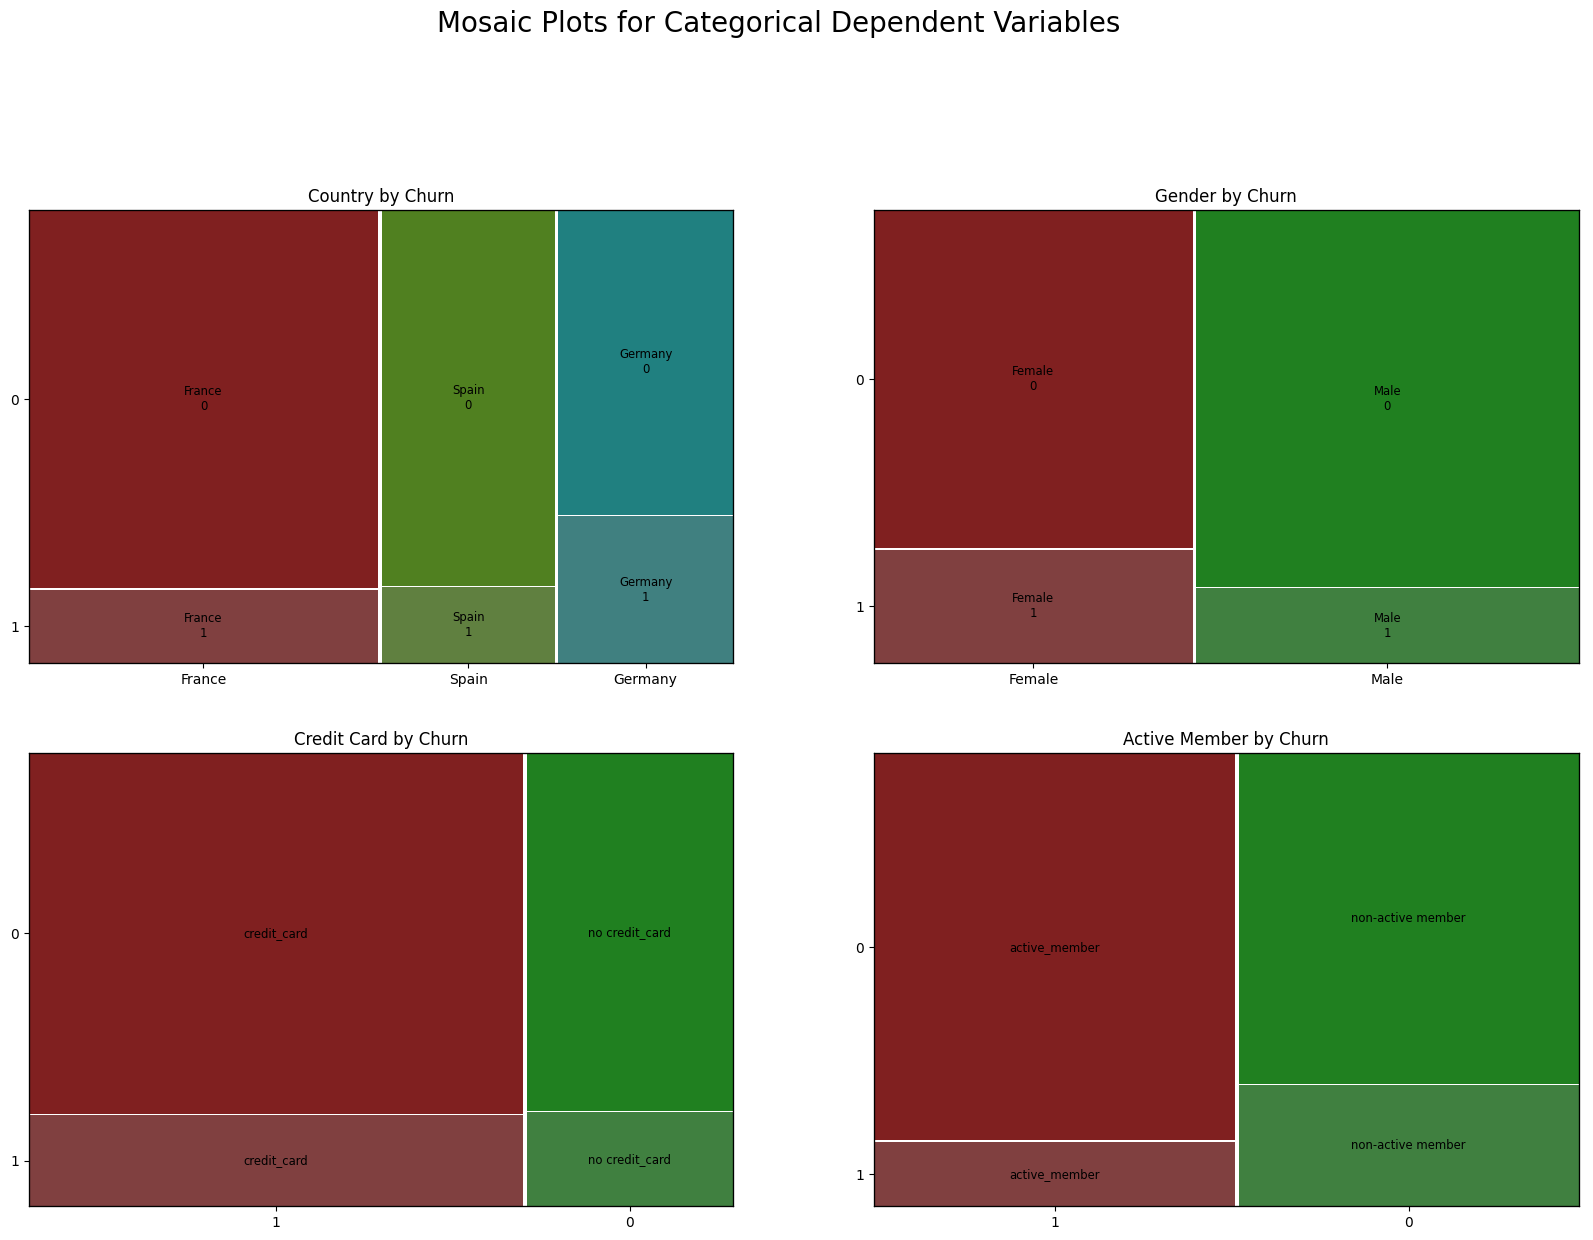

In [21]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("Mosaic Plots for Categorical Dependent Variables", fontsize=20) 

ax1 = plt.subplot(3,2,1)

mosaic(data, ['country', 'churn'], title="Country by Churn",ax=ax1)
ax2 = plt.subplot(3,2,2)

mosaic(data, ['gender', 'churn'], title="Gender by Churn", ax=ax2)
ax3 = plt.subplot(3,2,3)
labelizer = lambda k: {('0','0'): 'no credit_card', ('0','1'): 'no credit_card', ('1','0'): 'credit_card',('1','1'): 'credit_card'}[k]
mosaic(data, ['credit_card', 'churn'], labelizer =labelizer, title="Credit Card by Churn", ax=ax3)
ax4 = plt.subplot(3,2,4)
labels = lambda k: {('0','0'): 'non-active member', ('0','1'): 'non-active member', ('1','0'): 'active_member',('1','1'): 'active_member'}[k]
mosaic(data, ['active_member', 'churn'], labelizer=labels, title="Active Member by Churn", ax=ax4)
plt.show()

In [22]:
g_one_hot = pd.get_dummies(data['gender'])
g_one_hot.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [23]:
data = data.drop('gender',axis = 1)
# Join the encoded df
data = data.join(g_one_hot)
data.head()

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Female,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [24]:
c_one_hot = pd.get_dummies(data['country'])
#c_one_hot.head()

In [25]:
data2 = data.drop('country',axis = 1)
data2 = data2.join(c_one_hot)
#data2.head()

In [26]:
data2['zero_balance'] = np.where(data2['balance'] == 0.0, 1, 0) #leave this for later on! 

In [27]:
#data2.head()

In [28]:
data2 = data2.drop('balance',axis = 1)

In [29]:
first_column = data2.pop('churn')
data2.insert(0, 'churn', first_column)

In [30]:
data2.head()

,churn,credit_score,age,tenure,products_number,credit_card,active_member,estimated_salary,Female,Male,France,Germany,Spain,zero_balance
0,1,619,42,2,1,1,1,101348.88,1,0,1,0,0,1
1,0,608,41,1,1,0,1,112542.58,1,0,0,0,1,0
2,1,502,42,8,3,1,0,113931.57,1,0,1,0,0,0
3,0,699,39,1,2,0,0,93826.63,1,0,1,0,0,1
4,0,850,43,2,1,1,1,79084.10,1,0,0,0,1,0


In [31]:
data2.dtypes

churn                 int64
credit_score          int64
age                   int64
tenure                int64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
Female                uint8
Male                  uint8
France                uint8
Germany               uint8
Spain                 uint8
zero_balance          int64
dtype: object

In [32]:
numeric_vars = data2[['churn', 'credit_score', 'age', 'tenure','products_number', 'estimated_salary']]

In [33]:
corr_matrix = numeric_vars.corr().round(2)
print(corr_matrix)

                  churn  credit_score   age  tenure  products_number  \
churn              1.00         -0.03  0.29   -0.01            -0.05   
credit_score      -0.03          1.00 -0.00    0.00             0.01   
age                0.29         -0.00  1.00   -0.01            -0.03   
tenure            -0.01          0.00 -0.01    1.00             0.01   
products_number   -0.05          0.01 -0.03    0.01             1.00   
estimated_salary   0.01         -0.00 -0.01    0.01             0.01   

                  estimated_salary  
churn                         0.01  
credit_score                 -0.00  
age                          -0.01  
tenure                        0.01  
products_number               0.01  
estimated_salary              1.00  


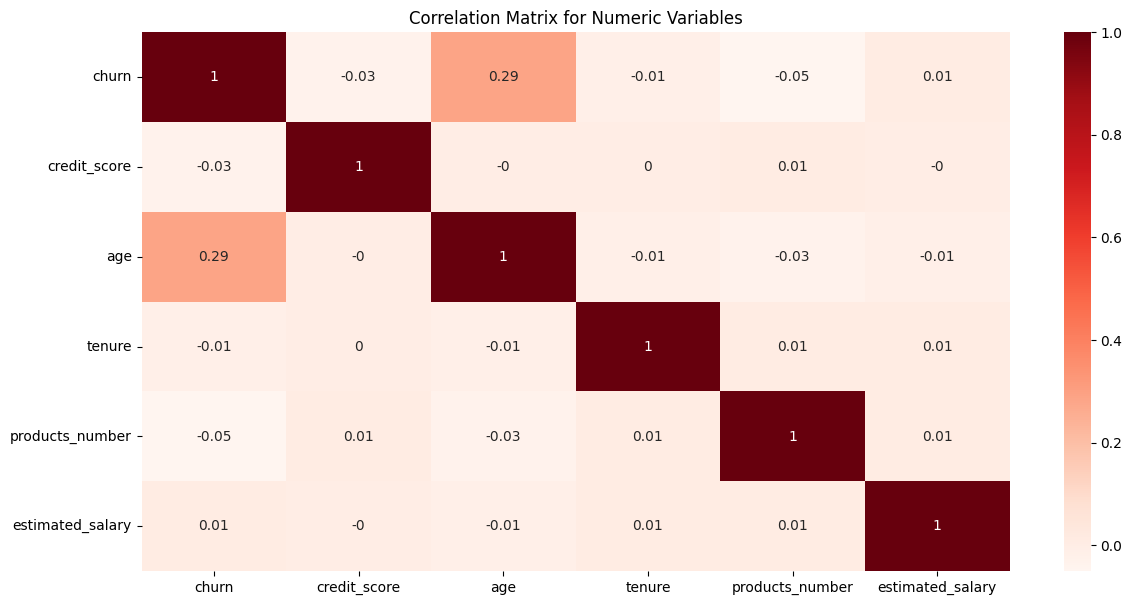

In [34]:
plt.figure(figsize = (14,7))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title(label="Correlation Matrix for Numeric Variables")
plt.show()

**Variable Selection**

In [35]:
data2.head()

,churn,credit_score,age,tenure,products_number,credit_card,active_member,estimated_salary,Female,Male,France,Germany,Spain,zero_balance
0,1,619,42,2,1,1,1,101348.88,1,0,1,0,0,1
1,0,608,41,1,1,0,1,112542.58,1,0,0,0,1,0
2,1,502,42,8,3,1,0,113931.57,1,0,1,0,0,0
3,0,699,39,1,2,0,0,93826.63,1,0,1,0,0,1
4,0,850,43,2,1,1,1,79084.10,1,0,0,0,1,0


In [36]:
features = data2.columns[1:14]
target = data2.columns[0]
X = data2[features].values
y = data2[target].values

In [37]:
print(X)

[[619.  42.   2. ...   0.   0.   1.]
 [608.  41.   1. ...   0.   1.   0.]
 [502.  42.   8. ...   0.   0.   0.]
 ...
 [709.  36.   7. ...   0.   0.   1.]
 [772.  42.   3. ...   1.   0.   0.]
 [792.  28.   4. ...   0.   0.   0.]]


In [38]:
print(y)

[1 0 1 ... 1 1 0]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [40]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([6359, 1641]))

In [41]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([1604,  396]))

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
lasso_glm = LogisticRegressionCV(Cs = [0.001, 0.005, 0.0075, 0.01, .05, .075, .1, .5, .75, 1], cv=10, penalty='l1', solver="liblinear", random_state=2).fit(X_train_scaled, y_train)

In [44]:
lasso_glm.C_

array([0.05])

In [45]:
cs = lasso_glm.Cs_
print(cs)

[0.001  0.005  0.0075 0.01   0.05   0.075  0.1    0.5    0.75   1.    ]


In [46]:
scs = lasso_glm.scores_[1]
scs

array([[0.795  , 0.79375, 0.79625, 0.80125, 0.80625, 0.80625, 0.80625,
        0.80375, 0.80375, 0.80375],
       [0.795  , 0.80125, 0.80125, 0.81125, 0.81   , 0.81   , 0.81   ,
        0.8125 , 0.81125, 0.81125],
       [0.795  , 0.80625, 0.805  , 0.80875, 0.82   , 0.82125, 0.82   ,
        0.8175 , 0.8175 , 0.8175 ],
       [0.795  , 0.8025 , 0.8075 , 0.8075 , 0.80625, 0.805  , 0.80625,
        0.8025 , 0.8025 , 0.80125],
       [0.795  , 0.80125, 0.80375, 0.81   , 0.815  , 0.815  , 0.81625,
        0.815  , 0.815  , 0.815  ],
       [0.795  , 0.79625, 0.8025 , 0.80625, 0.81125, 0.81   , 0.81   ,
        0.80875, 0.80875, 0.80875],
       [0.795  , 0.79125, 0.795  , 0.80125, 0.80625, 0.80375, 0.80375,
        0.80375, 0.80375, 0.80375],
       [0.795  , 0.8    , 0.805  , 0.81   , 0.8075 , 0.80875, 0.8075 ,
        0.81   , 0.81   , 0.81   ],
       [0.795  , 0.795  , 0.79875, 0.80375, 0.80375, 0.80375, 0.8025 ,
        0.80125, 0.80125, 0.80125],
       [0.79375, 0.795  , 0.805  , 0.

In [47]:
scores = np.mean(scs, axis=0)
scores

array([0.794875, 0.79825 , 0.802   , 0.806625, 0.80975 , 0.809625,
       0.8095  , 0.8085  , 0.808375, 0.80825 ])

Text(0, 0.5, 'Accuracy/Score for 0.5 Threshold')

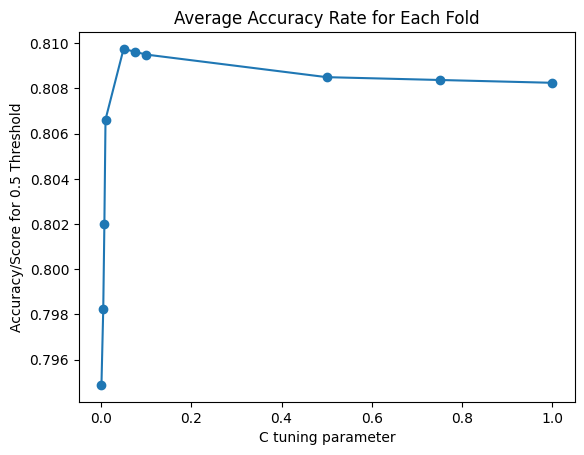

In [48]:
plt.plot(cs, scores, "-o") #Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
plt.title("Average Accuracy Rate for Each Fold")
plt.xlabel("C tuning parameter")
plt.ylabel('Accuracy/Score for 0.5 Threshold')

In [49]:
lasso_glm.coef_

array([[-0.01814378,  0.72043614, -0.03486288, -0.04349273, -0.0227542 ,
        -0.50621947,  0.01562966,  0.15976542, -0.07163175, -0.00107001,
         0.27854284,  0.        , -0.19793599]])

Text(0.5, 1.0, 'Magnitude of Coefficients Determined by Logistic Lasso')

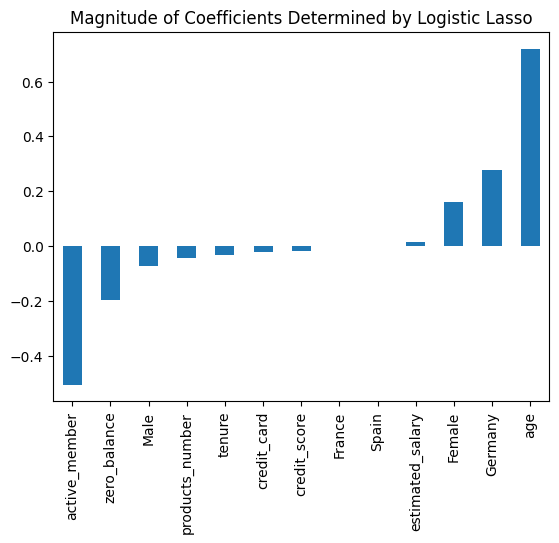

In [50]:
pd.Series(lasso_glm.coef_[0], features).sort_values(ascending = True).plot(kind = "bar")
plt.title("Magnitude of Coefficients Determined by Logistic Lasso")

**Modeling**

*Logistic Regression*

In [51]:
#13 features: remove : 9, 10, 12 (one-indexed, correct for zero based)

In [52]:
print(X_train)
X_train.shape

[[543.  30.   4. ...   0.   0.   0.]
 [668.  46.   0. ...   0.   0.   1.]
 [767.  35.   6. ...   1.   0.   0.]
 ...
 [686.  34.   3. ...   0.   0.   0.]
 [637.  41.   2. ...   0.   0.   1.]
 [614.  30.   3. ...   1.   0.   0.]]


(8000, 13)

In [53]:
X_train_mod = np.delete(X_train, [8,9,11], axis=1)

In [54]:
X_train_mod.shape

(8000, 10)

In [55]:
print(X_train_mod)

[[543.  30.   4. ...   0.   0.   0.]
 [668.  46.   0. ...   0.   0.   1.]
 [767.  35.   6. ...   1.   1.   0.]
 ...
 [686.  34.   3. ...   1.   0.   0.]
 [637.  41.   2. ...   0.   0.   1.]
 [614.  30.   3. ...   1.   1.   0.]]


In [56]:
X_test_mod = np.delete(X_test, [8,9,11], axis=1)

In [57]:
X_test_mod.shape #dropped irrelevant vars, but did not scale

(2000, 10)

In [58]:
log = LogisticRegression(random_state=0).fit(X_train_mod, y_train)

In [59]:
log.coef_

array([[-4.56200491e-03,  4.35590335e-02, -1.56321220e-03,
        -7.11305216e-04, -1.99925624e-04, -1.37854543e-03,
        -1.24710672e-06,  8.20365203e-04,  1.17576203e-03,
        -1.12528654e-03]])

In [60]:
probs = [np.exp(x)/(1 + np.exp(x)) for x in log.coef_[0]]
probs

[0.49885950075056334,
 0.51088803685534,
 0.49960919703076245,
 0.499822173703584,
 0.4999500185940424,
 0.4996553636976234,
 0.49999968822331914,
 0.5002050912891316,
 0.5002939404725663,
 0.49971867839343903]

In [61]:
log.score(X_train_mod, y_train)

0.786375

In [62]:
log.score(X_test_mod, y_test) #accuracy for test data

0.7965

In [63]:
#Citation: https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn

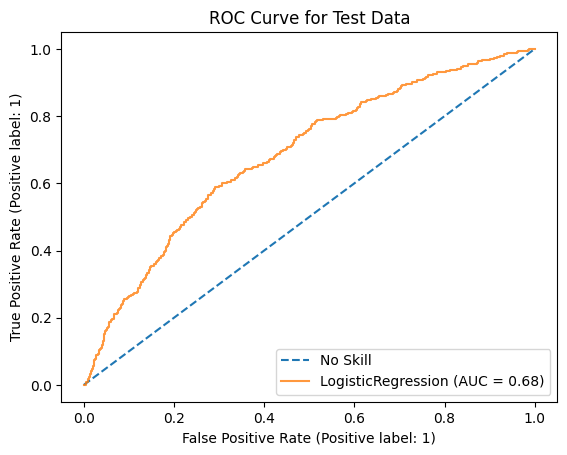

In [64]:
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle="--", label='No Skill')
log_disp = RocCurveDisplay.from_estimator(log, X_test_mod, y_test, ax=ax, alpha=0.8)
plt.title("ROC Curve for Test Data")
plt.show()

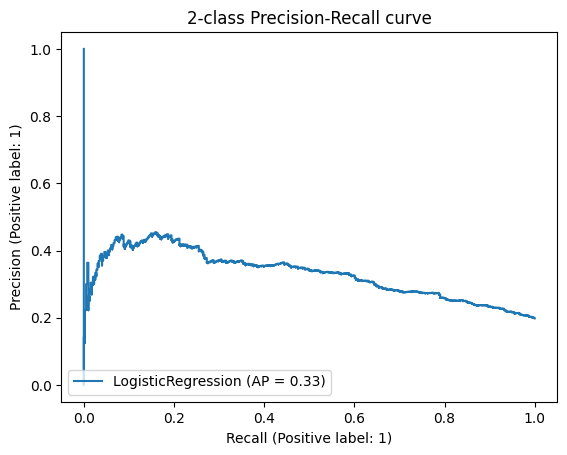

In [65]:
probs_y=log.predict_proba(X_test_mod) 

display = PrecisionRecallDisplay.from_predictions(y_test, probs_y[:,1], name="LogisticRegression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [66]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

#info on interpretation of PRCs

In [67]:
pred_proba = log.predict_proba(X_test_mod)[:,1]
#print(pred_proba)
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = np.where(pred_proba > i, 1, 0)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print('Accuracy/Score is {}'.format(test_accuracy))
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred, zero_division=1))


******** For i = 0.05 ******
Accuracy/Score is 0.1995
[[   3 1601]
 [   0  396]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1604
           1       0.20      1.00      0.33       396

    accuracy                           0.20      2000
   macro avg       0.60      0.50      0.17      2000
weighted avg       0.84      0.20      0.07      2000


******** For i = 0.1 ******
Accuracy/Score is 0.291
[[ 200 1404]
 [  14  382]]
              precision    recall  f1-score   support

           0       0.93      0.12      0.22      1604
           1       0.21      0.96      0.35       396

    accuracy                           0.29      2000
   macro avg       0.57      0.54      0.29      2000
weighted avg       0.79      0.29      0.25      2000


******** For i = 0.15 ******
Accuracy/Score is 0.446
[[ 552 1052]
 [  56  340]]
              precision    recall  f1-score   support

           0       0.91      0.34      0.50     

(0.0, 1.0)

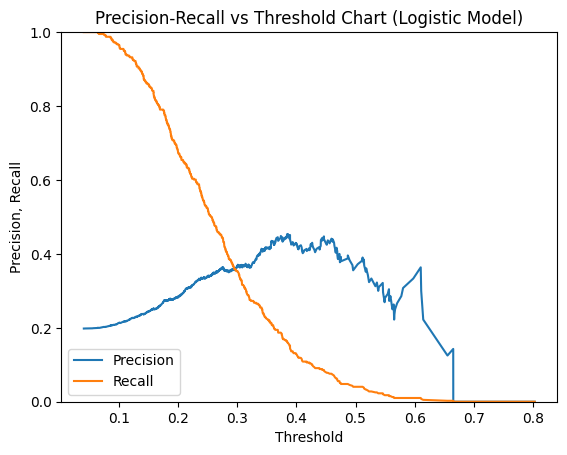

In [68]:
#pred_y=log.predict(X_test_mod) 

probs_y=log.predict_proba(X_test_mod) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first 
  #column of 
  #array) vs 1 (2nd column in array)

precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart (Logistic Model)")
plt.plot(thresholds, precision[: -1], label="Precision")
plt.plot(thresholds, recall[: -1], label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [69]:
#based off plot above, a threshold around 0.3 may produce the best prediction performance

*Random Forest*

In [70]:
# error_rates = [] #varying number of trees and number of features did not appear to significantly impact RF performance

# num_trees = range(50,120)
# for i in num_trees:
#     rf = RandomForestClassifier(n_estimators = i, random_state=0)
#     rf = rf.fit(X_train_mod, y_train)
#     rf_pred = rf.predict(X_test_mod)
#     rf_accuracy = accuracy_score(y_test, rf_pred)
#     error_rates.append(rf_accuracy)
    
# print(error_rates)

In [71]:
# plt.plot(num_trees, error_rates, '-o', label="RF Error Rates") 
# plt.title("Accuracy Against Number of Trees")
# plt.xlabel("RF Number of Trees")
# plt.ylabel('Accuracy')
# plt.grid()
# plt.legend(loc="upper right")

In [72]:
rf = RandomForestClassifier(random_state=0).fit(X_train_mod, y_train)

In [73]:
rf_preds = rf.predict(X_test_mod)

In [74]:
rf_accuracy = accuracy_score(y_test, rf_preds)
print('Accuracy/Score is {}'.format(rf_accuracy))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds, zero_division=1))

Accuracy/Score is 0.866
[[1537   67]
 [ 201  195]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1604
           1       0.74      0.49      0.59       396

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



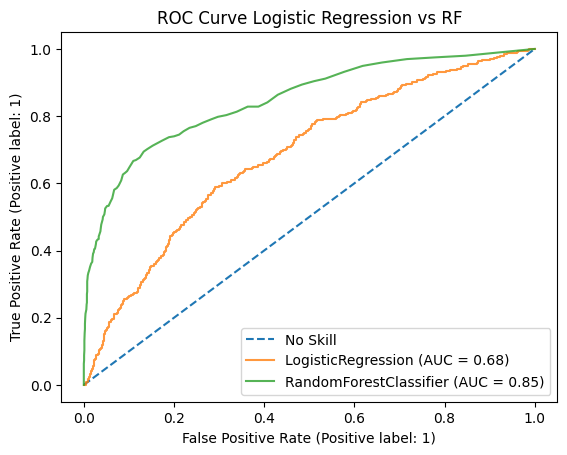

In [75]:
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle="--", label='No Skill')
log_disp.plot(ax=ax, alpha=0.8)
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test_mod, y_test, ax=ax, alpha=0.8)
plt.title("ROC Curve Logistic Regression vs RF")
plt.show()

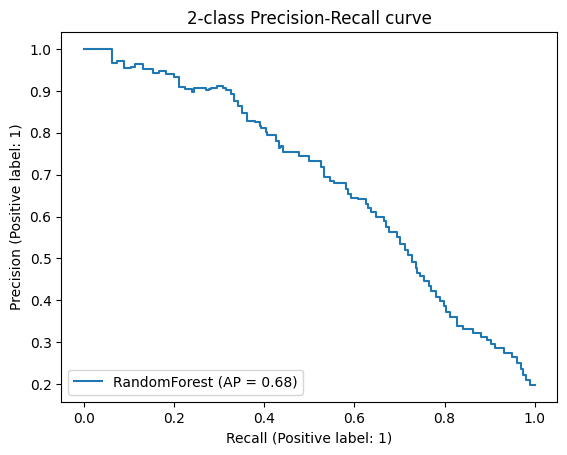

In [76]:
display = PrecisionRecallDisplay.from_estimator(
    rf, X_test_mod, y_test, name="RandomForest"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [77]:
rf.feature_importances_

array([0.18330255, 0.26450183, 0.09911398, 0.13126349, 0.02131865,
       0.04313341, 0.19025361, 0.02088831, 0.02481393, 0.02141024])

In [78]:
#data2.columns.values.tolist()

In [79]:
feature_names = [
 'credit_score',
 'age',
 'tenure',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'Female',
 'Germany',
 'zero_balance']

feature_names = np.array(feature_names)
print(feature_names)

['credit_score' 'age' 'tenure' 'products_number' 'credit_card'
 'active_member' 'estimated_salary' 'Female' 'Germany' 'zero_balance']


In [80]:
importances = rf.feature_importances_
print(importances)
important_names = feature_names[importances > np.mean(importances)]
print(important_names)

[0.18330255 0.26450183 0.09911398 0.13126349 0.02131865 0.04313341
 0.19025361 0.02088831 0.02481393 0.02141024]
['credit_score' 'age' 'products_number' 'estimated_salary']


In [81]:
#https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f#:~:text=The%20more%20a%20feature%20decreases,final%20importance%20of%20the%20variable.

*Refitting of Models*

In [82]:
X_train_mod2 = np.delete(X_train_mod, [2,4,5,7,8,9], axis=1) #delete 2, 4, 5, 7,8,9 (0 indexed)

In [83]:
#print(X_train_mod2)

In [84]:
X_test_mod2 = np.delete(X_test_mod, [2,4,5,7,8,9], axis=1)

In [85]:
#print(X_test_mod2)

In [86]:
rf2 = RandomForestClassifier(random_state=0).fit(X_train_mod2, y_train)

In [87]:
rf2_preds = rf2.predict(X_test_mod2) #refitting RF and Logistic Reg to reduced data did not improve performance

In [88]:
rf_accuracy = accuracy_score(y_test, rf2_preds)
print('Accuracy/Score is {}'.format(rf_accuracy))
print(confusion_matrix(y_test, rf2_preds))
print(classification_report(y_test, rf2_preds, zero_division=1))

Accuracy/Score is 0.8305
[[1491  113]
 [ 226  170]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1604
           1       0.60      0.43      0.50       396

    accuracy                           0.83      2000
   macro avg       0.73      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000



In [89]:
#log2 = LogisticRegression(random_state=0).fit(X_train_mod2, y_train)

In [90]:
#log2.score(X_test_mod2, y_test)

In [91]:
rf3 = RandomForestClassifier(random_state=0).fit(X_train, y_train)

In [92]:
rf3_preds = rf3.predict(X_test)

In [93]:
rf_accuracy = accuracy_score(y_test, rf3_preds) #RF fit to vars chosen by Lasso still performs the best
print('Accuracy/Score is {}'.format(rf_accuracy))
print(confusion_matrix(y_test, rf3_preds))
print(classification_report(y_test, rf3_preds, zero_division=1))

Accuracy/Score is 0.8615
[[1542   62]
 [ 215  181]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1604
           1       0.74      0.46      0.57       396

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



*KNN Classifier*

In [94]:
#distance-based algorithm, so requires scaling

In [95]:
scaler = StandardScaler()
X_train_mod_sc= scaler.fit_transform(X_train_mod)
X_test_mod_sc = scaler.transform(X_test_mod)

In [ ]:
ks = range(1, 40)
scores = []
recalls = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_mod_sc, y_train)
    preds = knn.predict(X_test_mod_sc)
    accuracy = knn.score(X_test_mod_sc, y_test)
    recall = classification_report(y_test, preds, zero_division=1, output_dict=True)['1']['recall']
    scores.append(accuracy)
    recalls.append(recall)

In [ ]:
plt.plot(ks, scores, "-o")
plt.title("Accuracy vs K Size")
plt.xlabel("K")
plt.ylabel('Accuracy/Score')

In [ ]:
plt.plot(ks, recalls, "-o") #Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
plt.title("Recall vs K Size")
plt.xlabel("K")
plt.ylabel('Recall')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15).fit(X_train_mod_sc, y_train) #best accuracy at k=15; best recall for k=1

In [ ]:
knn.score(X_test_mod_sc, y_test)

In [ ]:
knn_preds = knn.predict(X_test_mod_sc)

In [ ]:
knn_accuracy = accuracy_score(y_test, knn_preds) #RF fit to vars chosen by Lasso still performs the best
print('Accuracy/Score is {}'.format(knn_accuracy))
print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds, zero_division=1))

In [ ]:
#classification_report(y_test, knn_preds, zero_division=1, output_dict=True)['1']['recall']

In [ ]:
display = PrecisionRecallDisplay.from_estimator(
    knn, X_test_mod_sc, y_test, name="KNN"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle="--", label='No Skill')
log_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
knn_disp = RocCurveDisplay.from_estimator(knn, X_test_mod_sc, y_test, ax=ax, alpha=0.8)
plt.title("ROC Curve Comparing all models")
plt.show()

*Support Vector Machine*

In [ ]:
svm = SVC(kernel='rbf', random_state=0).fit(X_train_mod_sc, y_train)

In [ ]:
svm.score(X_test_mod_sc, y_test)

In [ ]:
svm_preds = svm.predict(X_test_mod_sc)

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_preds) #RF fit to vars chosen by Lasso still performs the best
print('Accuracy/Score is {}'.format(svm_accuracy))
print(confusion_matrix(y_test, svm_preds))
print(classification_report(y_test, svm_preds, zero_division=1))

In [ ]:
display = PrecisionRecallDisplay.from_estimator(
    svm, X_test_mod_sc, y_test, name="SVM"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle="--", label='No Skill')
log_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
knn_disp.plot(ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(svm, X_test_mod_sc, y_test, ax=ax, alpha=0.8)
plt.title("ROC Curve for all Models")
plt.show()

**Evaluation and Final Results**

In [ ]:
#mainly discussion of above; create chart comparing/contrasting models
#discuss which model best for classification
#discuss interpretation of variables

**Conclusion**

In [ ]:
#write about what was accomplished/learned
#suggestions for improvement: additional variables, segmentation of models, additional models to try